In [77]:
# global var set
import transformers

# model info, change as needed
batch_size = 16
num_epochs = 16

model_checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
# model_checkpoint = 'bert-base-uncased'
# fileTag = "original-plutchik-noCombin-v1"   # original - no Combine    - pure raw
# fileTag = "original-plutchik-v1"             # original - w/ Combine
# fileTag = "clean-noCombin-v1"                # clean    - no Combine
fileTag = "clean-v1"                         # clean    - w/ Combine    - pure clean

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [9]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [10]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//5], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5:trainDatasetOriginal.shape[0]//5*2], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*2:trainDatasetOriginal.shape[0]//5*3], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*3:trainDatasetOriginal.shape[0]//5*4], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*4], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//5 else (1 if x < trainDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < trainDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < trainDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//5], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5:testDatasetOriginal.shape[0]//5*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*2:testDatasetOriginal.shape[0]//5*3], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*3:testDatasetOriginal.shape[0]//5*4], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*4], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//5 else (1 if x < testDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < testDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < testDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)


In [11]:
trainDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,"['proud', 'excited', 'none']","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",Ivan took a few landscapes and some of himself.,She watched as the doll was passed around the ...,"One morning, Jim was admiring his crush, Micha...",But Carlos was glad to get it done.,He brought them home in a canvas bag.,1
1,"['upset', 'frightened', 'annoyed', 'none']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",Jasper notices his hands are very cold when he...,Sophia was a neat freak.,She stood up quickly and knocked the bottle ov...,Chad was eight Year's old and growing fast.,I am already looking forward to next year's fair.,2
2,"['satisfied', 'powerful', 'annoyed', 'surprise...","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",The chef knew tonight would be a busy night.,Jordan's mom is happy to see her little girl g...,When the other kids wouldn't move over I'd sta...,Tim pulled over to check on it.,They went outside the city areas.,2
3,['none'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",They stopped and looked at Gina.,Doug has always wanted to be married.,"Her dad was hesitant, but he allowed her to si...","Her mom bought her a Chinese outfit, but Ellie...",One day I decided I wanted to become a profess...,0
4,"['none', 'excited', 'JOLLY', 'happy']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",Travis was at a theme park.,I let them go play without my supervision.,"However, it broke apart when he lifted it up.","Tom was excited for Tuesday, it was his new fa...",She thought she included all the ingredients.,3
...,...,...,...,...,...,...,...,...
12410,"['surprise', 'FEELING UPSET', 'embarrassed']","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...","One day, Dan let his dog out in the back yard.",So he felt regretful about having the smoothie...,We also had a lot of food to eat.,Everything was taken except for one spot.,"Suddenly, he bumped one of the back tires.",4
12411,"['nervous', 'judged', 'none']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",They ran and ran until they finally collapsed.,They team up and become a band.,John was digging in his backyard when he found...,Charles contacted the seller.,The device could determine if he was a good or...,4
12412,"['none', 'Alarmed', 'Panic Stricken', 'sorrowf...","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",Tom was able to get something close enough.,Kevin took the car out for a drive for the fir...,Tom noticed his watch was missing.,He was rushed to the hospital by the employees...,To his delight this meant he didn't have to ta...,2
12413,"['Bored', 'Lonely', 'excited', 'hopeful', 'none']","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ...",Jimmy wanted to go to the playground.,Her teacher saw Holly napping.,"Candy was the owner's daughter, and Bill was a...",Eventually Chuck became incredibly fast.,Ed and Emma were twins and wanted to have matc...,0


In [12]:
testDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,"['happy', 'proud', 'commanding', 'none', 'vict...","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",They decided to drive to the house.,She earned a college scholarship by winning th...,He got up the nerve to ask if he could sit wit...,She said it was the best thing she'd ever tasted.,I put my earphones on and listen to music.,1
1,"['Competitive', 'Intimidated', 'excited', 'none']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","When I woke up, I found out that the skies wer...",At the first light the car next to him wanted ...,Charles hates Tameka.,They are now engaged.,A substitute teacher came to teach her class f...,1
2,"['surprised', 'amused', 'none']","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ...",Now Raymond is able to staple the papers toget...,I was in shape and ready for my upcoming wedding.,He took a train ride to the beautiful location.,Bob heard a weather report while listening to ...,"An hour later, the delivery man pulled up.",3
3,"['happy', 'satisfied', 'glad']","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",John was glad he had cleaned out his car.,Alex loves horror movies.,"Mia took a cab home, and was angry at her daug...",There was a great deal on mangoes.,Marvin was afraid to fly.,0
4,"['none', 'disappointed']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",A dead body was floating within a meter of whe...,Kay was taking piano lessons.,"When Ben opened his cookie, his was empty.",He looked in his car and most of his apartment.,They joined for their boyfriends.,2
...,...,...,...,...,...,...,...,...
11845,"['embarassed', 'surprised', 'humbled', 'sorry'...","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Being laid off meant more time to take his att...,"Their latest therapy was a special diet, which...",The friend told him that he actually was Mexican.,She cleaned the car from top to bottom.,The committee wanted to raise $1000 for the ne...,2
11846,"['excited', 'Excited', 'Happy']","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...","When he got there, he went to the locker room.",She cleaned out her garage and closets.,Many cars rushed out of the way to make room f...,She went to a place recommended by her friends.,Like usual this year her home was the most pop...,0
11847,"['Hopeful', 'excited', 'hopeful']","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",Every chance she had to make a scrapbook for s...,One day she saw a foreclosed home.,Thomas came home and caught his roommate steal...,"Instead of failing them, he had to fail the en...",Fred laughed and told Luke they should play ag...,1
11848,['none'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",We used the weekly circular to determine which...,They hit it off and kept talking to each other.,Aunt Becky use to be so calm.,DJ did her best and gave a powerful performance.,Anita wanted to make her son's father upset.,2


# load dataset

In [78]:
from datasets import load_dataset, load_metric

In [79]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/5Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/5Select-{fileTag}-test.csv'})

Using custom data configuration default-9a37d2835e3cbdf2
Reusing dataset csv (C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-9a37d2835e3cbdf2\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/2 [00:00<?, ?it/s]

In [80]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 11129
    })
})

In [81]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['honest', 'happy', 'proud']",
 'plutchik': "{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 0}",
 'selection0': 'Since school is starting soon, I want to give her time to adjust.',
 'selection1': "I wasn't allowed to have toys, so I played with my brother's.",
 'selection2': 'Mark was an honest soccer player who played by the rules.',
 'selection3': 'John desperately needed some money to pay bills.',
 'selection4': 'It was good food and it was cheap.',
 'label': 2}

In [82]:
def show_one(example):
    print(f"Context: {example['plutchik']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"  D - {example['selection3']}")
    print(f"  E - {example['selection4']}")
    print(f"\nGround truth: option {['A', 'B', 'C', 'D', 'E'][example['label']]}")

In [83]:
show_one(dataset["train"][0])

Context: {'joy': 2, 'trust': 3, 'fear': 0, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}
  A - James rushed to finish his PowerPoint.
  B - Breanna wants to lose some weight.
  C - George was walking past a row of parked bikes.
  D - He had to move away.
  E - Once he got there the beekeeper asked if Mark would like a tour.

Ground truth: option E


# Preprocessing Data

In [84]:
if model_checkpoint != 'distilbert-base-uncased-finetuned-sst-2-english':
    from transformers import AutoTokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
else:
    from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
    tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-cased")

loading file https://huggingface.co/distilbert-base-cased/resolve/main/vocab.txt from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ba377304984dc63e3ede0e23a938bbbf04d5c3835b66d5bb48343aecca188429.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791
loading file https://huggingface.co/distilbert-base-cased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/distilbert-base-cased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/distilbert-base-cased/resolve/main/tokenizer_config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\81e970e5e6ec68be12da0f8f3b2f2469c78d579282299a2ea65b4b7441719107.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f
loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f

In [85]:
import re
import ast
selectionList = ["selection0", "selection1", "selection2", 'selection3', 'selection4']
weightRemap = ["NOT ", "LITTLE ", "", "VERY ", "ABSOLUTELY "]
def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*2 for context in examples["emotion"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '')) ]*2 for context in examples["plutchik"] ]
    first_sentences = [["The following sentences contain emotions: {}".format(", ".join([weightRemap[int(eachCaseWeight.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", ""))] 
                                                        + eachCaseEmotionType.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", "").strip()
                        for eachCaseWeight, eachCaseEmotionType in 
                        zip([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]][eventIndex], 
                           [re.split(':|,',eachEmotionCombination)[::2] for eachEmotionCombination in examples["plutchik"]][eventIndex])]))]*5 for eventIndex in 
                           range(len([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]]))]
    
    # first_sentences = [["The following sentences contain emotions: {}".format(', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
    #                    for eachEmotion in ast.literal_eval(context).items()]))]*2 
    #                    for context in examples["plutchik"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList]for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+5] for i in range(0, len(v), 5)] for k, v in tokenized_examples.items()}

In [86]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 5 [46, 46, 47, 43, 52]


In [87]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(4) ]

['[CLS] The following sentences contain emotions : joy, VERY trust, NOT fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] James rushed to finish his PowerPoint. [SEP]',
 '[CLS] The following sentences contain emotions : joy, VERY trust, NOT fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] Breanna wants to lose some weight. [SEP]',
 '[CLS] The following sentences contain emotions : joy, VERY trust, NOT fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] George was walking past a row of parked bikes. [SEP]',
 '[CLS] The following sentences contain emotions : joy, VERY trust, NOT fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] He had to move away. [SEP]',
 '[CLS] The following sentences contain emotions : NOT joy, NOT trust, fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] She always gossiped about other people and said ugly things. [SEP]',
 '[CLS] The follow

In [88]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/12 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

In [89]:
if model_checkpoint != 'distilbert-base-uncased-finetuned-sst-2-english':
    from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
    model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)
else:
    from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
    from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
    import torch
    model = DistilBertForMultipleChoice.from_pretrained("distilbert-base-cased")

loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f.302bfd1b5e031cc1b17796e0b6e5b242ba2045d31d00f97589e12b458ebff27a
Model config DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.2",
  "vocab_size": 28996
}

loading weights file https://huggingface.co/distilbert-base-cased/resolve/main/pytorch_model.bin from cache at C:\Users\JAM_0/.cache\huggingface\transformers\9c9f39769dba4c5fe379b4bc82973eb01297bd607954621434eb9f1bc85a23a0.06b428c8733

In [90]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    learning_rate=5e-6, # for bert-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [91]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [92]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [93]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(4)]

['[CLS] The following sentences contain emotions : NOT joy, NOT trust, fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] Paul purchased a book from the bookstore. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : NOT joy, NOT trust, fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] The dog started sniffing intently under a bush. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : NOT joy, NOT trust, fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation [SEP] The next day, it took all her courage to be interviewed. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : NOT joy, NOT trust, fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, an

In [94]:
show_one(dataset["train"][8])

Context: {'joy': 0, 'trust': 0, 'fear': 2, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}
  A - Paul purchased a book from the bookstore.
  B - The dog started sniffing intently under a bush.
  C - The next day, it took all her courage to be interviewed.
  D - Mike went to light the grill.
  E - As the stars came into view she stood in awe.

Ground truth: option C


# Trainer Defined

In [95]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [96]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [97]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: selection1, selection0, selection3, Unnamed: 0, emotion, plutchik, selection2, selection4. If selection1, selection0, selection3, Unnamed: 0, emotion, plutchik, selection2, selection4 are not expected by `DistilBertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 11610
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization ste

Epoch,Training Loss,Validation Loss,Accuracy
1,1.610500,1.598718,0.262288
2,1.581600,1.345828,0.378201
3,1.343900,1.331349,0.386558
4,1.314000,1.335611,0.396981
5,1.250600,1.331430,0.401653
6,1.208700,1.341696,0.402642
7,1.172100,1.342984,0.411088
8,1.139000,1.345296,0.415581
9,1.112200,1.381272,0.419894
10,1.072100,1.396625,0.415850


Saving model checkpoint to distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: selection1, selection0, selection3, Unnamed: 0, emotion, plutchik, selection2, selection4. If selection1, selection0, selection3, Unnamed: 0, emotion, plutchik, selection2, selection4 are

TrainOutput(global_step=11616, training_loss=1.165351300200155, metrics={'train_runtime': 1934.6141, 'train_samples_per_second': 96.019, 'train_steps_per_second': 6.004, 'total_flos': 1.542035577538794e+16, 'train_loss': 1.165351300200155, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

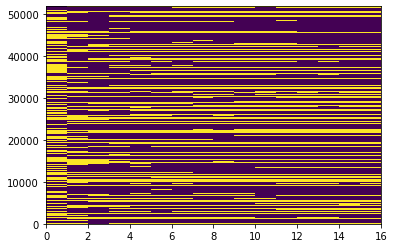

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [70]:
import pandas as pd
if model_checkpoint == 'distilbert-base-uncased-finetuned-sst-2-english':
    model_checkpoint = 'distilbert-base'
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Plutchik] 5Select/TI-{model_checkpoint}-{fileTag}.csv')

In [71]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Plutchik] 5Select/ESI-{model_checkpoint}-{fileTag}.csv')